In [3]:
import shutil
import os

In [2]:
#os.makedirs('/kaggle/working/Chula-ParasiteEgg-11')

In [3]:
#shutil.rmtree("/kaggle/working/Chula-ParasiteEgg-11")

## Read json file and get the labels

In [5]:
import json
from sklearn.model_selection import train_test_split
import pandas as pd

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
file = open('/kaggle/input/chula-parasite-dataset/Chula-ParasiteEgg-11/Chula-ParasiteEgg-11/Chula-ParasiteEgg-11/labels.json')
data = json.load(file)

### Creating a dataframe for image details

In [7]:
image_df = pd.DataFrame.from_dict(pd.json_normalize(data['images']), orient='columns')
image_df

,id,file_name,height,width,license,coco_url
0,1,Hymenolepis nana_0001.jpg,672,1280,1,None
1,2,Hymenolepis nana_0002.jpg,960,896,1,None
2,3,Hymenolepis nana_0003.jpg,672,1280,1,None
3,4,Hymenolepis nana_0004.jpg,960,1280,1,None
4,5,Hymenolepis nana_0005.jpg,960,1280,1,None
...,...,...,...,...,...,...
10995,10996,Hookworm egg_0996.jpg,3264,1714,1,None
10996,10997,Hookworm egg_0997.jpg,3264,2448,1,None
10997,10998,Hookworm egg_0998.jpg,3264,2448,1,None
10998,10999,Hookworm egg_0999.jpg,2285,2448,1,None


### Creating a dataframe for annotation details

In [8]:
annotation_df = pd.DataFrame.from_dict(pd.json_normalize(data['annotations']), orient='columns')
annotation_df

,id,image_id,category_id,bbox,area
0,1,1,6,"[555.0, 76.0, 177.0, 188.0]",33276.0
1,2,2,6,"[549.0, 459.0, 178.0, 151.0]",26878.0
2,3,3,6,"[538.0, 449.0, 206.0, 170.0]",35020.0
3,4,4,6,"[542.0, 384.0, 173.0, 166.0]",28718.0
4,5,5,6,"[483.0, 373.0, 224.0, 190.0]",42560.0
...,...,...,...,...,...
11026,11027,10996,4,"[523.0, 1611.0, 198.0, 262.0]",51876.0
11027,11028,10997,4,"[1353.0, 1482.0, 218.0, 267.0]",58206.0
11028,11029,10998,4,"[1366.0, 1754.0, 171.0, 298.0]",50958.0
11029,11030,10999,4,"[1132.0, 1323.0000000000002, 211.0, 242.0]",51062.0


In [9]:
duplicate_values = annotation_df['image_id'].duplicated()
duplicate_values

0        False
1        False
2        False
3        False
4        False
         ...  
11026    False
11027    False
11028    False
11029    False
11030    False
Name: image_id, Length: 11031, dtype: bool

### Merging the two dataframes 

In [10]:
merged_df = pd.merge(image_df, annotation_df, left_on='id', right_on='image_id', how='inner')

# Drop the extra 'image_id' column as it's now redundant
merged_df.drop(columns=['image_id'], inplace=True)
merged_df

,id_x,file_name,height,width,license,coco_url,id_y,category_id,bbox,area
0,1,Hymenolepis nana_0001.jpg,672,1280,1,None,1,6,"[555.0, 76.0, 177.0, 188.0]",33276.0
1,2,Hymenolepis nana_0002.jpg,960,896,1,None,2,6,"[549.0, 459.0, 178.0, 151.0]",26878.0
2,3,Hymenolepis nana_0003.jpg,672,1280,1,None,3,6,"[538.0, 449.0, 206.0, 170.0]",35020.0
3,4,Hymenolepis nana_0004.jpg,960,1280,1,None,4,6,"[542.0, 384.0, 173.0, 166.0]",28718.0
4,5,Hymenolepis nana_0005.jpg,960,1280,1,None,5,6,"[483.0, 373.0, 224.0, 190.0]",42560.0
...,...,...,...,...,...,...,...,...,...,...
11026,10996,Hookworm egg_0996.jpg,3264,1714,1,None,11027,4,"[523.0, 1611.0, 198.0, 262.0]",51876.0
11027,10997,Hookworm egg_0997.jpg,3264,2448,1,None,11028,4,"[1353.0, 1482.0, 218.0, 267.0]",58206.0
11028,10998,Hookworm egg_0998.jpg,3264,2448,1,None,11029,4,"[1366.0, 1754.0, 171.0, 298.0]",50958.0
11029,10999,Hookworm egg_0999.jpg,2285,2448,1,None,11030,4,"[1132.0, 1323.0000000000002, 211.0, 242.0]",51062.0


### Calculate bbox in the format that compatible with YOLO model

In [11]:
# Calculate bbox_yolo values
merged_df['bbox_yolo'] = merged_df.apply(lambda row: [
    ((row['bbox'][0] + row['bbox'][2] / 2) / row['width']),
    ((row['bbox'][1] + row['bbox'][3] / 2) / row['height']),
    (row['bbox'][2] / row['width']),
    (row['bbox'][3] / row['height'])
], axis=1)

# Display the DataFrame with the new bbox_yolo field
merged_df

,id_x,file_name,height,width,license,coco_url,id_y,category_id,bbox,area,bbox_yolo
0,1,Hymenolepis nana_0001.jpg,672,1280,1,None,1,6,"[555.0, 76.0, 177.0, 188.0]",33276.0,"[0.502734375, 0.25297619047619047, 0.13828125,..."
1,2,Hymenolepis nana_0002.jpg,960,896,1,None,2,6,"[549.0, 459.0, 178.0, 151.0]",26878.0,"[0.7120535714285714, 0.5567708333333333, 0.198..."
2,3,Hymenolepis nana_0003.jpg,672,1280,1,None,3,6,"[538.0, 449.0, 206.0, 170.0]",35020.0,"[0.50078125, 0.7946428571428571, 0.1609375, 0...."
3,4,Hymenolepis nana_0004.jpg,960,1280,1,None,4,6,"[542.0, 384.0, 173.0, 166.0]",28718.0,"[0.491015625, 0.4864583333333333, 0.13515625, ..."
4,5,Hymenolepis nana_0005.jpg,960,1280,1,None,5,6,"[483.0, 373.0, 224.0, 190.0]",42560.0,"[0.46484375, 0.4875, 0.175, 0.19791666666666666]"
...,...,...,...,...,...,...,...,...,...,...,...
11026,10996,Hookworm egg_0996.jpg,3264,1714,1,None,11027,4,"[523.0, 1611.0, 198.0, 262.0]",51876.0,"[0.3628938156359393, 0.5337009803921569, 0.115..."
11027,10997,Hookworm egg_0997.jpg,3264,2448,1,None,11028,4,"[1353.0, 1482.0, 218.0, 267.0]",58206.0,"[0.5972222222222222, 0.49494485294117646, 0.08..."
11028,10998,Hookworm egg_0998.jpg,3264,2448,1,None,11029,4,"[1366.0, 1754.0, 171.0, 298.0]",50958.0,"[0.5929330065359477, 0.5830269607843137, 0.069..."
11029,10999,Hookworm egg_0999.jpg,2285,2448,1,None,11030,4,"[1132.0, 1323.0000000000002, 211.0, 242.0]",51062.0,"[0.5055147058823529, 0.6319474835886215, 0.086..."


## Splitting training and validation sets

In [12]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(merged_df, test_size=0.2, random_state=42)

In [13]:
train_df

,id_x,file_name,height,width,license,coco_url,id_y,category_id,bbox,area,bbox_yolo
3101,3092,Capillaria philippinensis_0092.jpg,3264,1714,1,None,3102,1,"[325.0, 1675.0, 148.0, 146.0]",21608.0,"[0.23278879813302217, 0.5355392156862745, 0.08..."
10982,10953,Hookworm egg_0953.jpg,3264,2448,1,None,10983,4,"[1118.0, 1930.0, 206.00000000000003, 281.0]",57886.0,"[0.4987745098039216, 0.6343443627450981, 0.084..."
2122,2113,Enterobius vermicularis_0113.jpg,672,1280,1,None,2123,2,"[630.0, 94.0, 203.0, 182.0]",36946.0,"[0.571484375, 0.27529761904761907, 0.15859375,..."
8935,8926,Opisthorchis viverrine_0926.jpg,3264,2448,1,None,8936,7,"[1232.0, 1822.9999999999998, 124.0, 68.0]",8432.0,"[0.5285947712418301, 0.5689338235294117, 0.050..."
1921,1913,Ascaris lumbricoides_0913.jpg,2285,2448,1,None,1922,0,"[1000.0, 457.0, 241.0, 260.0]",62660.0,"[0.4577205882352941, 0.25689277899343543, 0.09..."
...,...,...,...,...,...,...,...,...,...,...,...
5734,5725,Paragonimus spp_0725.jpg,960,1280,1,None,5735,8,"[553.0, 302.0, 232.0, 358.0]",83056.0,"[0.52265625, 0.5010416666666667, 0.18125, 0.37..."
5191,5182,Paragonimus spp_0182.jpg,1080,1344,1,None,5192,8,"[803.0, 457.0, 252.0, 158.0]",39816.0,"[0.6912202380952381, 0.4962962962962963, 0.187..."
5390,5381,Paragonimus spp_0381.jpg,2822,3024,1,None,5391,8,"[1408.0, 690.0, 308.0, 381.0]",117348.0,"[0.5165343915343915, 0.3120127569099929, 0.101..."
860,860,Hymenolepis nana_0860.jpg,4032,3024,1,None,861,6,"[1515.0, 2045.0000000000002, 224.0, 236.0]",52864.0,"[0.5380291005291006, 0.5364583333333334, 0.074..."


In [14]:
val_df

,id_x,file_name,height,width,license,coco_url,id_y,category_id,bbox,area,bbox_yolo
8054,8045,Opisthorchis viverrine_0045.jpg,960,1280,1,None,8055,7,"[514.0, 463.0, 100.0, 69.0]",6900.0,"[0.440625, 0.5182291666666666, 0.078125, 0.071..."
1595,1588,Ascaris lumbricoides_0588.jpg,4032,2117,1,None,1596,0,"[466.0, 1971.0, 364.0, 243.0]",88452.0,"[0.3060935285781767, 0.5189732142857143, 0.171..."
8029,8020,Opisthorchis viverrine_0020.jpg,960,896,1,None,8030,7,"[155.0, 456.0, 121.99999999999999, 64.0]",7808.0,"[0.24107142857142858, 0.5083333333333333, 0.13..."
4862,4853,Hymenolepis diminuta_0853.jpg,672,1280,1,None,4863,5,"[527.0, 31.0, 250.0, 257.0]",64250.0,"[0.509375, 0.23735119047619047, 0.1953125, 0.3..."
7189,7180,Fasciolopsis buski_0180.jpg,4032,2117,1,None,7190,3,"[265.0, 1606.0, 640.0, 504.0]",322560.0,"[0.27633443552196507, 0.46081349206349204, 0.3..."
...,...,...,...,...,...,...,...,...,...,...,...
9100,9088,Taenia spp. egg_0088.jpg,960,896,1,None,9101,9,"[118.0, 394.0, 146.0, 167.0]",24382.0,"[0.21316964285714285, 0.4973958333333333, 0.16..."
1020,1020,Ascaris lumbricoides_0020.jpg,960,1280,1,None,1021,0,"[529.0, 366.0, 213.0, 267.0]",56871.0,"[0.496484375, 0.5203125, 0.16640625, 0.278125]"
705,705,Hymenolepis nana_0705.jpg,1080,1920,1,None,706,6,"[890.0, 485.0, 142.0, 116.0]",16472.0,"[0.5005208333333333, 0.5027777777777778, 0.073..."
2948,2939,Enterobius vermicularis_0939.jpg,2285,2448,1,None,2949,2,"[1001.0, 1815.0, 145.0, 216.0]",31320.0,"[0.43852124183006536, 0.8415754923413566, 0.05..."


### Copying training and validation images to kaggle/working

In [15]:
import os
import shutil

src_path = r"/kaggle/input/chula-parasite-dataset/Chula-ParasiteEgg-11/Chula-ParasiteEgg-11/Chula-ParasiteEgg-11/data"
train_dst_path = r"/kaggle/working/Chula-ParasiteEgg-11/images/train"
val_dst_path = r"/kaggle/working/Chula-ParasiteEgg-11/images/val"

# Create destination directories if they don't exist
os.makedirs(train_dst_path, exist_ok=True)
os.makedirs(val_dst_path, exist_ok=True)

# Copy files for the training set
for index, row in train_df.iterrows():
    filename = row['file_name']
    src_file = os.path.join(src_path, filename)
    dst_file = os.path.join(train_dst_path, filename)
    
    if os.path.exists(src_file):
        shutil.copy(src_file, dst_file)
    else:
        print(f"Source file {src_file} does not exist.")

# Copy files for the validation set
for index, row in val_df.iterrows():
    filename = row['file_name']
    src_file = os.path.join(src_path, filename)
    dst_file = os.path.join(val_dst_path, filename)
    shutil.copy(src_file, dst_file)

print('Copied')

Copied


## Visualize the images

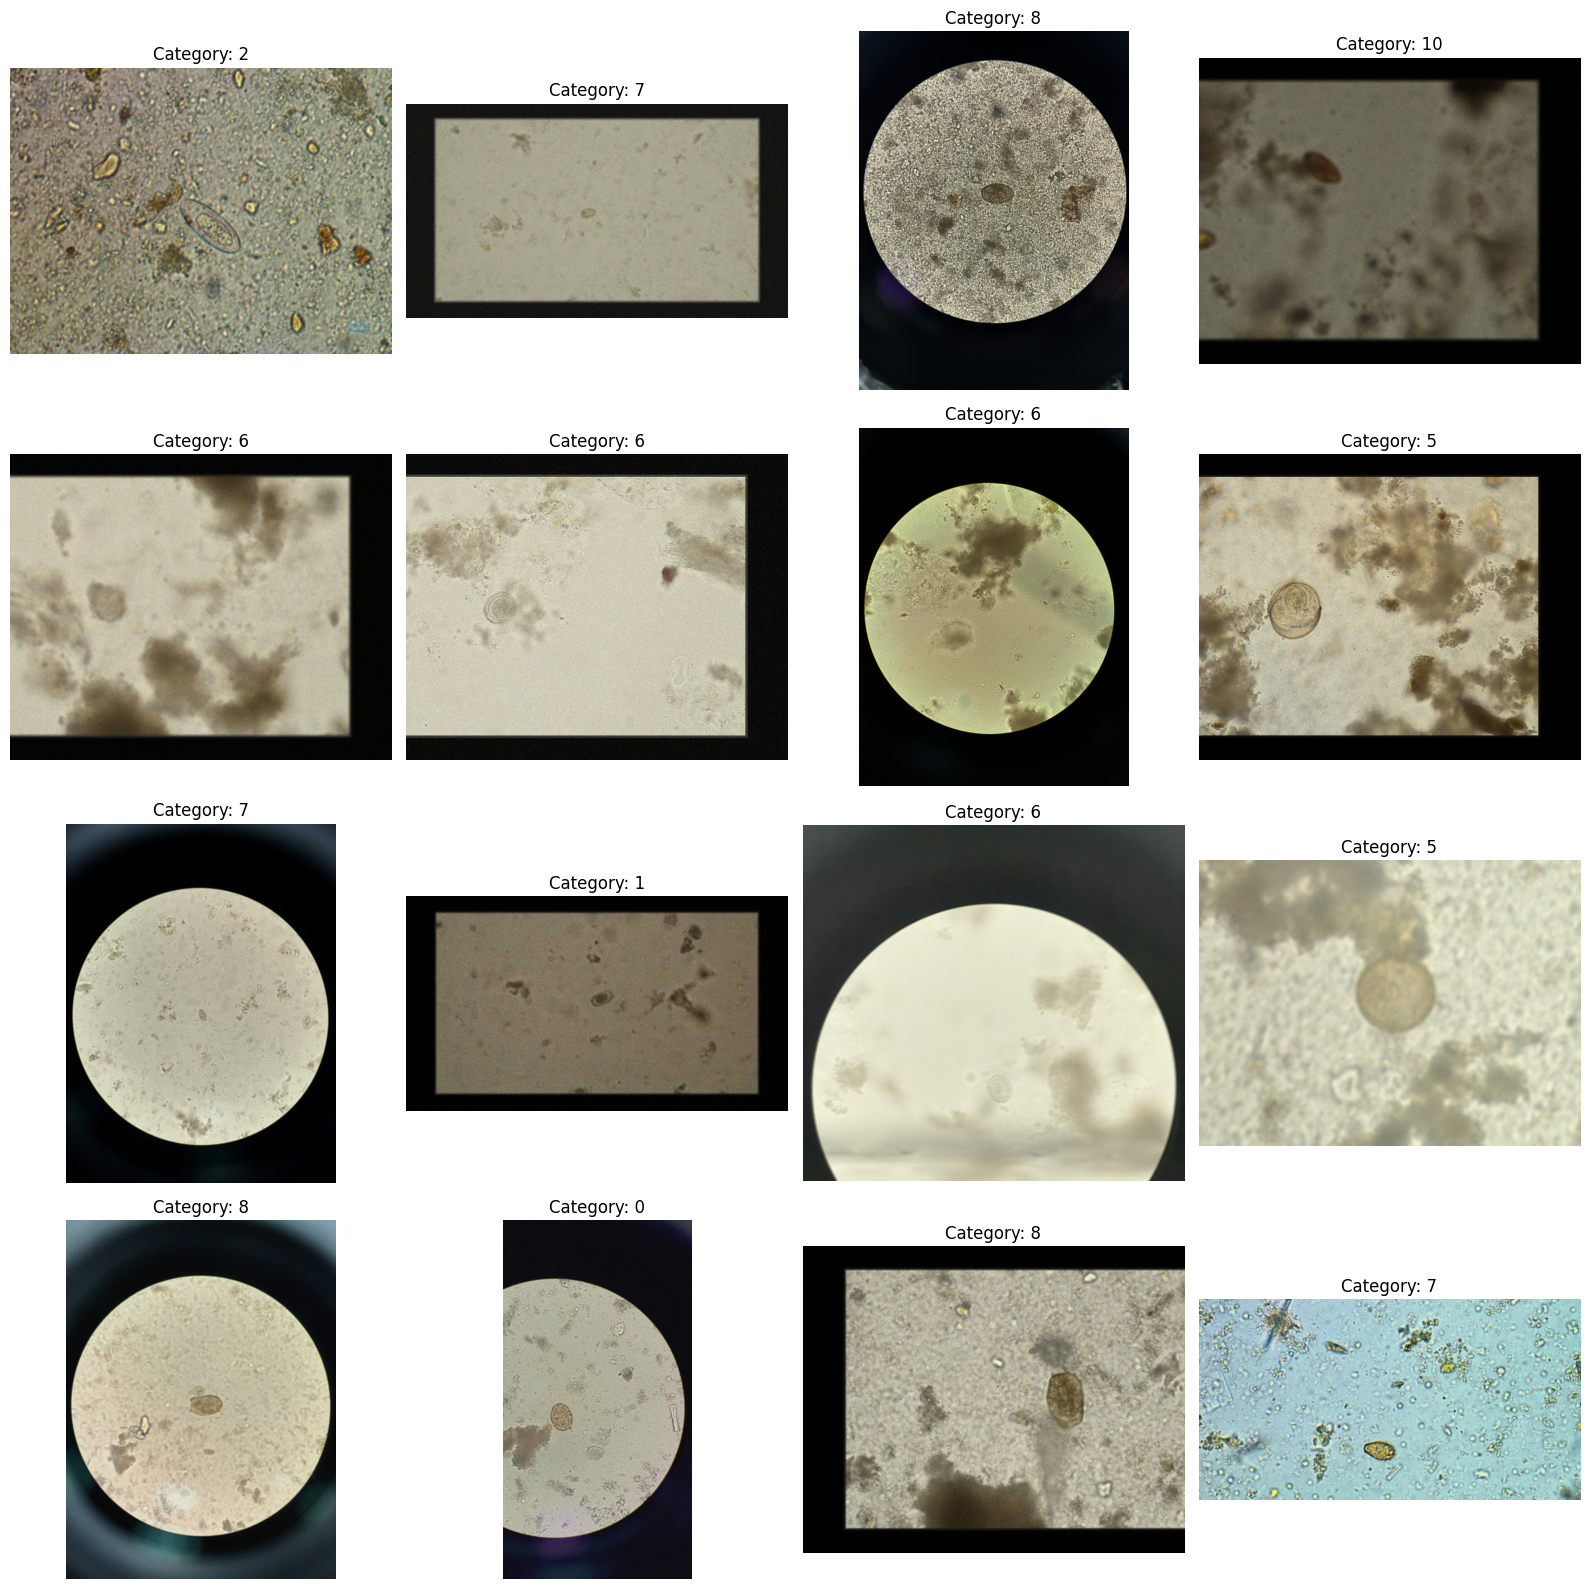

In [16]:
import os
import random
import cv2
import matplotlib.pyplot as plt

image_dir = "/kaggle/working/Chula-ParasiteEgg-11/images/train"

shuffled_df = train_df.sample(frac=1)

num_rows = 4
num_cols = 4
total_images = num_rows * num_cols

plt.figure(figsize=(16, 16))

for i, (_, row) in enumerate(shuffled_df.head(total_images).iterrows()):
    img_filename = row['file_name']  
    img_path = os.path.join(image_dir, img_filename)
    image = cv2.imread(img_path)  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    category = row['category_id']  
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(image)
    plt.title(f"Category: {category}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Creating labels for training and validation set (YOLO model needed .txt files containing labels)

In [17]:
import os

# Define the output directories
train_output_dir = '/kaggle/working/Chula-ParasiteEgg-11/labels/train'
val_output_dir = '/kaggle/working/Chula-ParasiteEgg-11/labels/val'

# Create the output directories if they don't exist
os.makedirs(train_output_dir, exist_ok=True)
os.makedirs(val_output_dir, exist_ok=True)

# Create text files for train_df
for index, row in train_df.iterrows():
    category_id = row['category_id']
    bbox = row['bbox_yolo']
    filename = os.path.splitext(row['file_name'])[0]  # Remove the '.jpg' extension

    # Create the text content
    text_content = f"{category_id} {' '.join(map(str, bbox))}"

    # Write the text content to a file in the train output directory
    output_filename = os.path.join(train_output_dir, f"{filename}.txt")
    with open(output_filename, 'w') as text_file:
        text_file.write(text_content)

# Create text files for val_df
for index, row in val_df.iterrows():
    category_id = row['category_id']
    bbox = row['bbox_yolo']
    filename = os.path.splitext(row['file_name'])[0]  # Remove the '.jpg' extension

    # Create the text content
    text_content = f"{category_id} {' '.join(map(str, bbox))}"

    # Write the text content to a file in the validation output directory
    output_filename = os.path.join(val_output_dir, f"{filename}.txt")
    with open(output_filename, 'w') as text_file:
        text_file.write(text_content)


### Installing ultralytics library 

In [18]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 kB 14.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


## Building YOLOv8 model and load pre-trained weights

In [19]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8n.yaml")  # build a new model from scratch
#model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Use the model
results = model.train(data="/kaggle/input/yaml-with-train-val/Chula_ParasiteEgg_yaml.yaml", epochs=10, batch=16, optimizer='RAdam')  # train the model
metrics = model.val()  # evaluate model performance on the validation set

#results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
#path = model.export(format="onnx")  # export the model to ONNX format


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /kaggle/working/Chula-ParasiteEgg-11/labels/train... 8804 images, 0 backgrounds, 2 corrupt: 100%|██████████| 8804/8804 [00:07<00:00, 1161.44it/s]
train: WARNING ⚠️ /kaggle/working/Chula-ParasiteEgg-11/images/train/Hookworm egg_0339.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0899]
train: WARNING ⚠️ /kaggle/working/Chula-ParasiteEgg-11/images/train/Opisthorchis viverrine_0143.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2664]
train: New cache created: /kaggle/working/Chula-ParasiteEgg-11/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/working/Chula-ParasiteEgg-11/labels/val... 2205 images, 0 backgrounds, 3 

lr/pg0,█▅▂▂▂▁▁▁▁▁
lr/pg1,▂▆█▇▇▆▅▃▂▁
lr/pg2,▂▆█▇▇▆▅▃▂▁
metrics/mAP50(B),▁▄▁▆▆▆████
metrics/mAP50-95(B),▁▃▁▆▅▆▇███
metrics/precision(B),▁▃▃▆▆▆▇███
metrics/recall(B),▁▃▁▆▅▅▇▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,██▇▆▅▄▃▂▂▁


Ultralytics YOLOv8.0.206 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/Chula-ParasiteEgg-11/labels/val.cache... 2205 images, 0 backgrounds, 3 corrupt: 100%|██████████| 2205/2205 [00:00<?, ?it/s]
val: WARNING ⚠️ /kaggle/working/Chula-ParasiteEgg-11/images/val/Ascaris lumbricoides_0526.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0442]
val: WARNING ⚠️ /kaggle/working/Chula-ParasiteEgg-11/images/val/Opisthorchis viverrine_0012.jpg: ignoring corrupt image/label: negative label values [   -0.10435]
val: WARNING ⚠️ /kaggle/working/Chula-ParasiteEgg-11/images/val/Opisthorchis viverrine_0144.jpg: ignoring corrupt image/label: negative label values [ -0.0044643]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [01:19<00:00,  1.73it/s]
                   all       2202 

In [1]:
import shutil
import os

# Source directory with 2200 images
source_directory = '/kaggle/input/chula-parasite-dataset/Chula-ParasiteEgg-11_test/test/data/'

# Destination directory where you want to copy the 500 images
os.makedirs('/kaggle/working/Chula-ParasiteEgg-11/images/test', exist_ok=True)
destination_directory = '/kaggle/working/Chula-ParasiteEgg-11/images/test'

# List the first 500 images from the source directory
images_to_copy = os.listdir(source_directory)[:500]

# Copy the selected images to the destination directory
for image in images_to_copy:
    source_path = os.path.join(source_directory, image)
    destination_path = os.path.join(destination_directory, image)
    shutil.copy(source_path, destination_path)

# Verify that the images have been copied
copied_images = os.listdir(destination_directory)
print(f"Copied {len(copied_images)} images to {destination_directory}")


Copied 500 images to /kaggle/working/Chula-ParasiteEgg-11/images/test


In [ ]:
results = model.predict(source="/kaggle/input/chula-parasite-dataset/Chula-ParasiteEgg-11_test/test/data", save=True, show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/2200 /kaggle/input/chula-parasite-dataset/Chula-ParasiteEgg-11_test/test/data/0001.jpg: 480x640 1 Paragonimus spp, 72.9ms
image 2/2200 /kaggle/input/chula-parasite-dataset/Chula-ParasiteEgg-11_test/test/data/0002.jpg: 640x480 1 Opisthorchis viverrine, 13.2ms
image 3/2200 /kaggle/input/chula-parasite-dataset/Chula-ParasiteEgg-11_test/test/data/0003.jpg: 640x352 1 Hookworm 

## Zip the output files to download

In [4]:
source_directory = '/kaggle/working/wandb'
zip_file_path = '/kaggle/working/wandb.zip'
shutil.make_archive(zip_file_path.split(".")[0], 'zip', source_directory)

'/kaggle/working/wandb.zip'

In [5]:
source_directory = '/kaggle/working/runs'
zip_file_path = '/kaggle/working/runs.zip'
shutil.make_archive(zip_file_path.split(".")[0], 'zip', source_directory)

'/kaggle/working/runs.zip'